# NBA SHOT ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('DATASETS/NBA_Shots_1997_2019.csv')

data.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


We select only the columns we are interested in. As we want to explore the shots, we will also remove the ones that were made from the player's own side of the court, as those are made as a last resource at the end of the periods. Also, apart from other small changes, we will transform the **Game ID** into **Season**.

In [2]:
clean_data = data[['Game ID','Player Name','Team Name','Shot Distance','Shot Type','X Location','Y Location',
                 'Shot Made Flag']]

clean_data = clean_data.drop(clean_data[clean_data['Shot Distance']>35].index)
clean_data['Shot Type'] = np.where(clean_data['Shot Type'] == '2PT Field Goal', 2, 3)
clean_data['Season']=clean_data['Game ID'].astype(str).str[1:3]

clean_data.head()

,Game ID,Player Name,Team Name,Shot Distance,Shot Type,X Location,Y Location,Shot Made Flag,Season
0,29700427,Tim Legler,Washington Wizards,15,2,117,109,1,97
1,29700427,Tim Legler,Washington Wizards,14,2,143,25,0,97
2,29700427,Tim Legler,Washington Wizards,10,2,-87,55,0,97
3,29700427,Tim Legler,Washington Wizards,5,2,-1,53,0,97
4,29700427,Tim Legler,Washington Wizards,14,2,89,113,0,97


Lets start by looking at how the percentatge of the number of two and three pointers attempts has **evolved** across seasons:

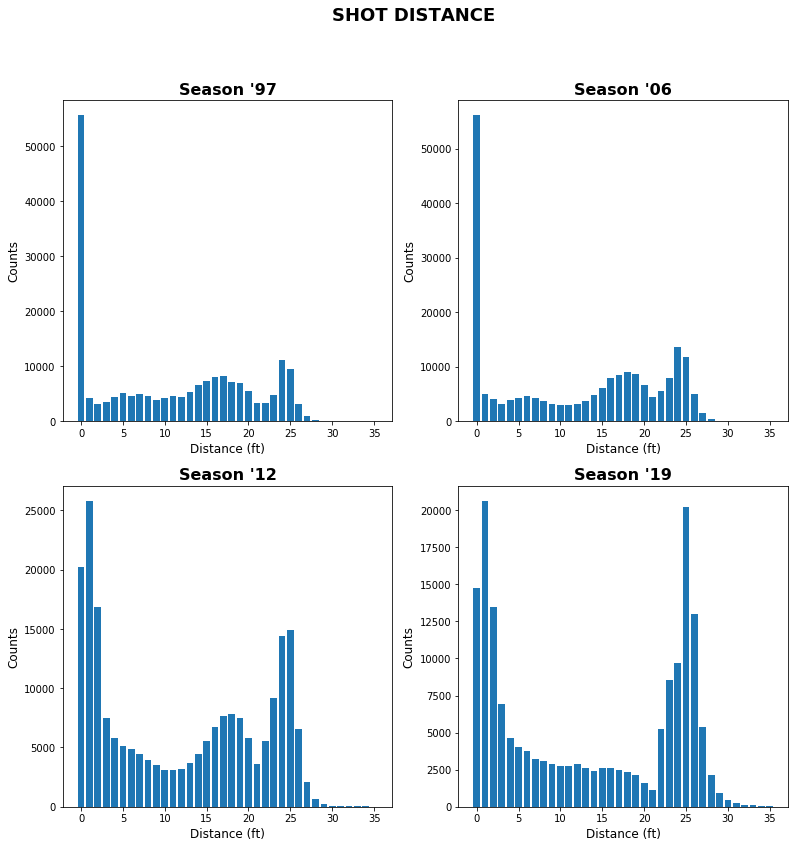

In [176]:
# DISTRIBUTION OF SHOTS BY DISTANCE

seasons = ['97','06','12','19']
plt.figure(figsize=(13,13))
plt.suptitle("SHOT DISTANCE", fontsize=18,weight='bold')

for i in range(4):
    plt.subplot(2,2,i+1)
    distribution = clean_data[clean_data['Season']==seasons[i]]['Shot Distance'].value_counts().sort_index().to_numpy()
    plt.bar(np.arange(0,len(distribution)),distribution)
    plt.title('Season \''+seasons[i],fontsize=16,weight='bold')
    plt.xlabel('Distance (ft)',fontsize=12)
    plt.ylabel('Counts',fontsize=12)


plt.show()

### GENERAL SHOT LOCATION

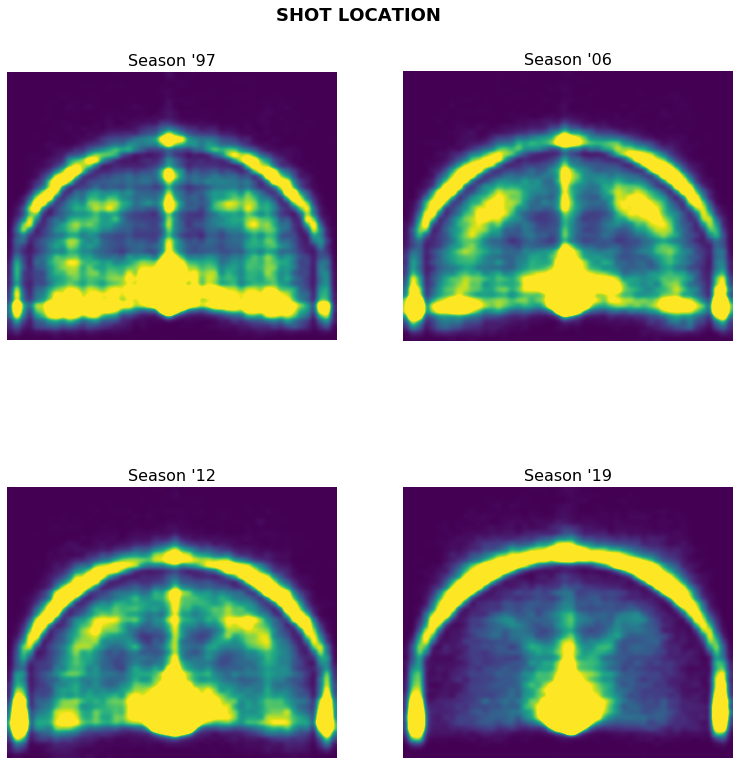

In [149]:
X = clean_data.groupby('Season')['X Location'].apply(np.array)
Y = clean_data.groupby('Season')['Y Location'].apply(np.array)
inter = 'gaussian'
cmap = 'viridis'
plt.figure(figsize=(13,13))
plt.suptitle("SHOT LOCATION", fontsize=18,weight='bold')
left  = 0.125; right = 0.9; bottom = 0.1; top = 0.99; wspace = 0.2;hspace = 0; 
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.subplot(2,2,1)
heatmap, xedges, yedges = np.histogram2d(X[-3], Y[-3], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, extent = extent, interpolation = inter,cmap=cmap, origin='lower',vmin=0,vmax=150)
plt.axis('off')
plt.title('Season \'97',fontsize=16)

plt.subplot(2,2,2)
heatmap, xedges, yedges = np.histogram2d(X[6], Y[6], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, extent = extent, interpolation = inter,cmap=cmap, origin='lower',vmin=0,vmax=150)
plt.title('Season \'06',fontsize=16)
plt.axis('off')

plt.subplot(2,2,3)
heatmap, xedges, yedges = np.histogram2d(X[12], Y[12], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, extent = extent, interpolation = inter,cmap=cmap, origin='lower',vmin=0,vmax=150)
plt.title('Season \'12',fontsize=16)
plt.axis('off')

plt.subplot(2,2,4)
heatmap, xedges, yedges = np.histogram2d(X[-4], Y[-4], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, extent = extent, interpolation = inter,cmap=cmap, origin='lower',vmin=0,vmax=150)
plt.title('Season \'19',fontsize=16)
plt.axis('off')
plt.show()

Based on the heatmaps above, we can visually observe how every time more and more scoring attempts are from **over the three point line**, and some shot positions that once where important (i.e. mid-range 45º) now have lost importance.

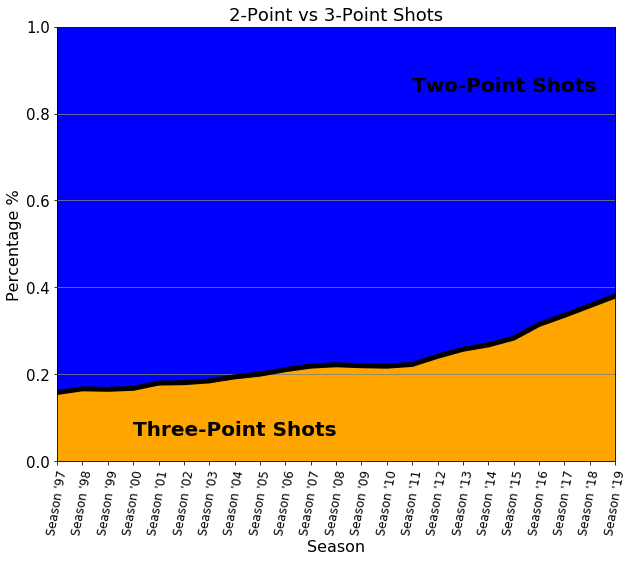

In [376]:
shots = clean_data.groupby('Season')['Shot Type'].value_counts(normalize=True,sort=False).to_numpy()
shots = np.roll(shots,6)
num_seasons = clean_data.Season.nunique()
three_point = [shots[2*i+1] for i in range(num_seasons)]

plt.figure(figsize=(10,8))
plt.plot(three_point,color='black',linewidth=5)
plt.fill_between(np.arange(23),three_point,np.zeros(23),color = 'orange')
plt.fill_between(np.arange(23),three_point,np.ones(23),color = 'blue')
plt.title('2-Point vs 3-Point Shots',fontsize = 18)
plt.xticks(np.arange(23), 'Season \''+ clean_data.Season.unique(),rotation = 80,fontsize = 12)
plt.xlabel('Season',fontsize = 16)
plt.ylabel('Percentage %',fontsize = 16)
plt.xlim([0,22])
plt.ylim([0,1])
plt.grid(axis='y',color = 'gray')
plt.text(14, 0.85, 'Two-Point Shots', fontsize=20,weight='bold')
plt.text(3, 0.06, 'Three-Point Shots', fontsize=20,weight='bold')
plt.show()

We can clearly see that number of three pointers attempts with respect to the 2-point shots has more than doubled over the last decades, so we are now going to explore what has happened to the **accuracy** of the three pointer shots, and the **impact** they have on the games:

### ACCURACY

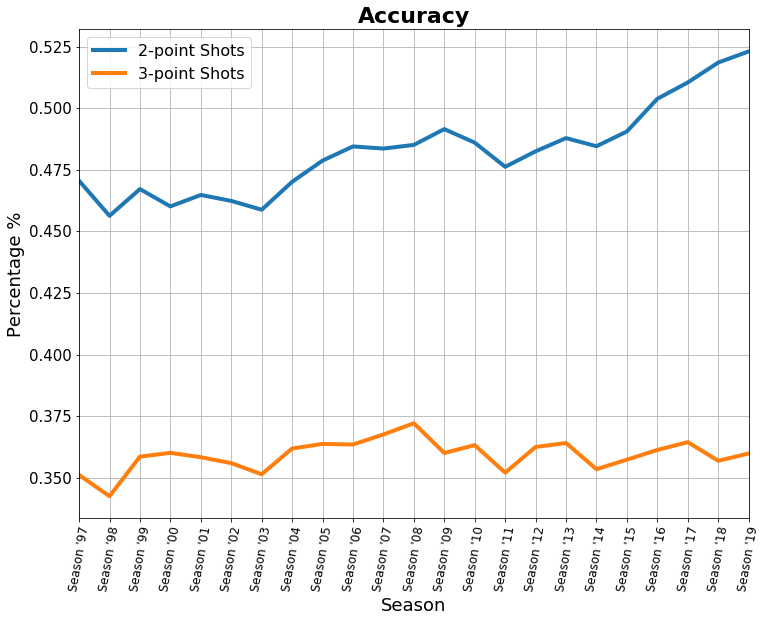

In [377]:
accuracy = clean_data.groupby(['Season','Shot Type'])['Shot Made Flag'].value_counts(normalize=True,sort=False).to_numpy()
two_accuracy = np.roll([accuracy[4*i+1] for i in range(num_seasons) ],3)
three_accuracy = np.roll([accuracy[4*i+3] for i in range(num_seasons) ],3)
plt.figure(figsize = (12,9))
plt.plot(np.arange(23),two_accuracy,linewidth=4,label='2-point Shots')
plt.plot(np.arange(23),three_accuracy,linewidth=4,label='3-point Shots')
plt.title('Accuracy',fontsize=22,weight='bold')
plt.xticks(np.arange(23), 'Season \''+ clean_data.Season.unique(),rotation = 80,fontsize = 12)
plt.xlabel('Season',fontsize = 18)
plt.ylabel('Percentage %',fontsize = 18)
plt.xlim([0,22])
plt.legend(fontsize='16')
plt.grid()
plt.show()

We can observe that there isn't an incrase in accuracy in 3-point shots, but the accuracy of 2 point shots has slightly imporoved, so we could think that the shift towrards thorwing more 3-point shots is due to other factors. 

### IMPACT

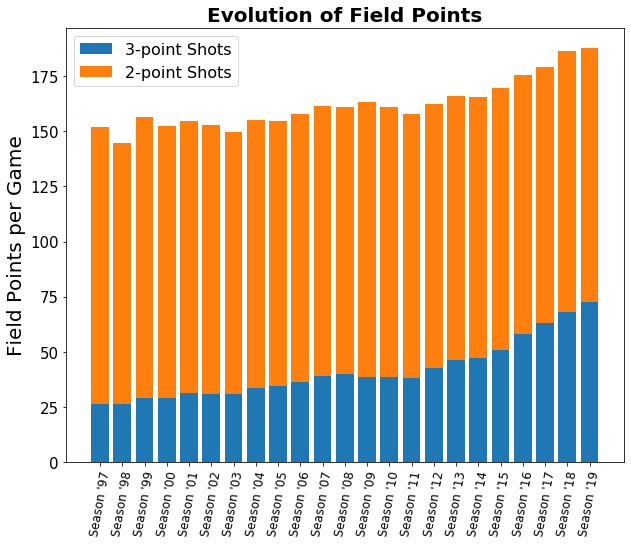

In [396]:
points = clean_data[clean_data['Shot Made Flag']==1].groupby('Season')['Shot Type'].value_counts().to_numpy()
points = np.roll(points,6)
num_games = clean_data.groupby('Season')['Game ID'].nunique().to_numpy()
num_games = np.roll(num_games,3)
two_point_agg = 2*np.ones(num_seasons)/num_games
three_point_agg = 3*np.ones(num_seasons)/num_games
for i in range(num_seasons):
    two_point_agg[i] *= points[2*i]
    three_point_agg[i] *= points[2*i+1]
    

X = np.arange(num_seasons)
plt.figure(figsize=(10,8))
plt.bar(X,three_point_agg,label='3-point Shots')
plt.bar(X,two_point_agg, bottom = three_point_agg,label = '2-point Shots')
plt.xticks(X, 'Season \''+ clean_data.Season.unique(),rotation = 80,fontsize = 12)
plt.ylabel('Field Points per Game',fontsize = 20)
plt.title('Evolution of Field Points',fontsize= 20, weight = 'bold')
plt.legend(fontsize = 16)
plt.show()

We can observe that the contribution to the game score of 3-point shots has **more than doubled**, but the one of the 2-point shots only has slightly decreased. Overall, there has been a **+20 average** increase in total points per game, due to the impact of the 3-point shots. These data obviously suggest that there must have been an increase also in the **total number of shots** per game so let's explore that:

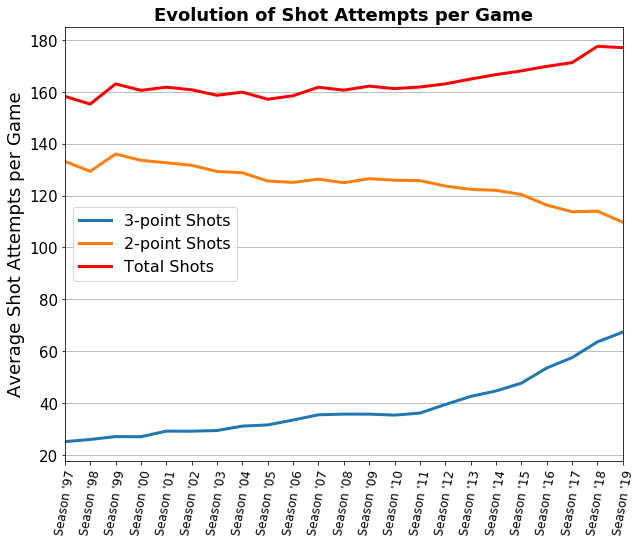

In [470]:
total_shots = clean_data.groupby('Season')['Shot Type'].agg('count').to_numpy()
total_shots = np.roll(total_shots,3)
total_shots = total_shots/num_games
shots = clean_data.groupby('Season')['Shot Type'].value_counts().to_numpy()
shots = np.roll(shots,6)

plt.figure(figsize=(10,8))
plt.plot([shots[2*i+1] for i in range(num_seasons)]/num_games,linewidth=3,label = '3-point Shots')  
plt.plot([shots[2*i] for i in range(num_seasons)]/num_games,linewidth=3,label = '2-point Shots')
plt.plot(total_shots,color = 'r',linewidth=3,label = 'Total Shots')
plt.ylabel('Average Shot Attempts per Game',fontsize=18)
plt.title('Evolution of Shot Attempts per Game',fontsize=18,weight='bold')
plt.grid(axis='y')
plt.xticks(X, 'Season \''+ clean_data.Season.unique(),rotation = 80,fontsize = 12)
plt.xlim([0,22])
plt.legend(fontsize = 16, loc = 0)
plt.show()

So, why is this trend on the increase? What supports this shifts in the tactics of basketball? Lets look at one additional metric, the **points per shot**:

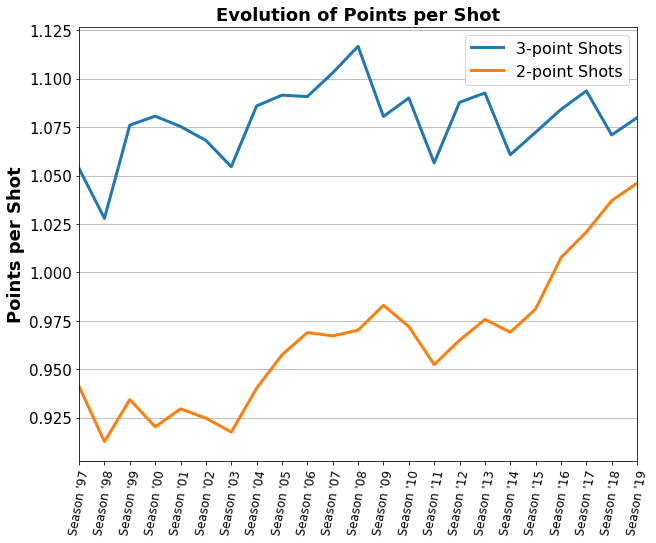

In [467]:
plt.figure(figsize=(10,8))
plt.plot(three_accuracy*3,label = '3-point Shots',linewidth=3)
plt.plot(two_accuracy*2,label = '2-point Shots',linewidth=3)
plt.title('Evolution of Points per Shot',fontsize = 18,weight='bold')
plt.ylabel('Points per Shot',fontsize = 18,weight='bold')
plt.xticks(X, 'Season \''+ clean_data.Season.unique(),rotation = 80,fontsize = 12)
plt.xlim([0,22])
plt.grid(axis='y')
plt.legend(fontsize = 16)
plt.show()

As this last metric suggests, it is more efficient to attempt a 3-point shot, hence more players and team focus on them. However, it must be noted that the 2-point shot efficiency is increasing while the number of attempts is decreasing, so we can assume that either players select better the 2-point shots they attempt or that defenders do not pay the same attention to them.

## MORE ANALYTICS

### 3-POINT SHOT ACCURACY DEPENDING ON POSITION

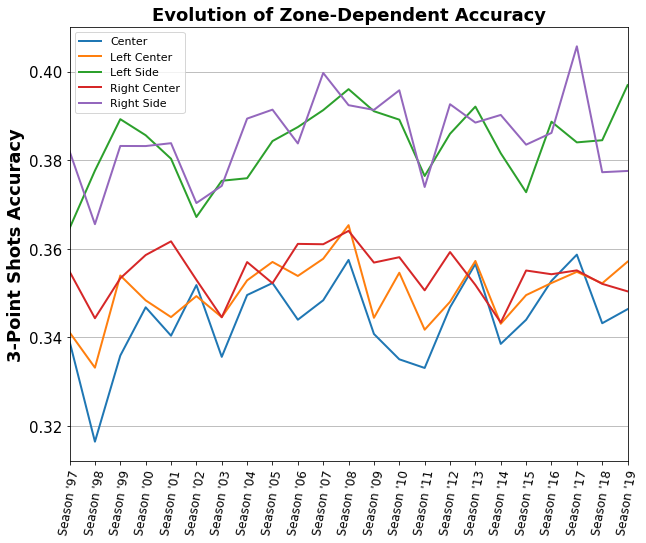

In [511]:
add_data = data[['Game ID','Shot Distance','Shot Type','Shot Made Flag','Shot Zone Area']]


add_data = add_data.drop(add_data[add_data['Shot Distance']>35].index)
add_data['Shot Type'] = np.where(add_data['Shot Type'] == '2PT Field Goal', 2, 3)
add_data['Season']=add_data['Game ID'].astype(str).str[1:3]
add_data = add_data.drop(add_data[add_data['Shot Type']==2].index)

position = add_data.groupby(['Season','Shot Zone Area'])['Shot Made Flag'].value_counts(normalize=True,sort=False).to_numpy()
position = np.roll(position,30)


plt.figure(figsize=(10,8))
plt.plot([position[10*i+1] for i in range(num_seasons)],label = 'Center',linewidth=2)
plt.plot([position[10*i+3] for i in range(num_seasons)], label = 'Left Center',linewidth=2)
plt.plot([position[10*i+5] for i in range(num_seasons)],label = 'Left Side',linewidth=2)
plt.plot([position[10*i+7] for i in range(num_seasons)], label = 'Right Center',linewidth=2)
plt.plot([position[10*i+9] for i in range(num_seasons)], label = 'Right Side',linewidth=2)
plt.title('Evolution of Zone-Dependent Accuracy',fontsize = 18,weight='bold')
plt.ylabel('3-Point Shots Accuracy',fontsize = 18,weight='bold')
plt.xticks(X, 'Season \''+ clean_data.Season.unique(),rotation = 80,fontsize = 12)
plt.xlim([0,22])
plt.grid(axis='y')
plt.legend(fontsize = 11)
plt.show()

We can observe a very **similar** accuracy on all the locations, however the right and left side have a slightly higher accuracy. These locations are the ones closer to the hoop(22 feet) and the center locations, which is the one with the worst accuracy, is the one located furthest (23.9 feet).

### INDIVIDUAL SHOOTERS

Let's see the players that scored **more three point shots** in a game:

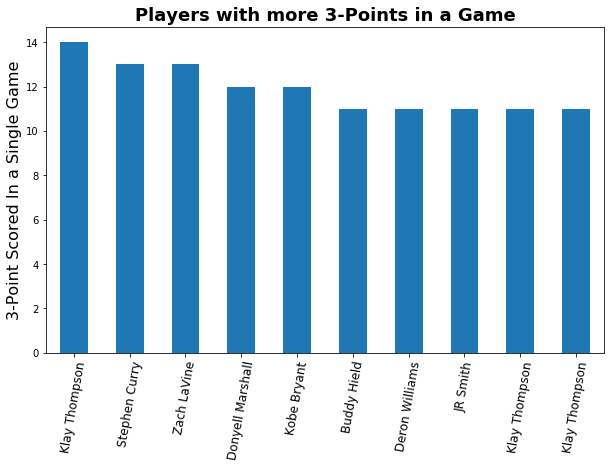

In [297]:
made_in_a_game = pd.DataFrame(clean_data[(clean_data['Shot Type']==3) & (clean_data['Shot Made Flag']==1)].\
groupby(['Player Name','Game ID'])['Shot Made Flag'].agg('count').nlargest(10))

index = made_in_a_game.index.values.tolist()
ax = made_in_a_game.plot.bar(figsize=(10,6),legend=False)
ax.set_title('Players with more 3-Points in a Game',fontsize=18,weight='bold')
ax.set_xlabel('')
ax.set_ylabel("3-Point Scored In a Single Game",fontsize=16)
plt.xticks(np.arange(10), [index[i][0] for i in range(10)],rotation = 80,fontsize = 12)
plt.show()

Let's see now which are the players that score more **3_Points per game** on average:

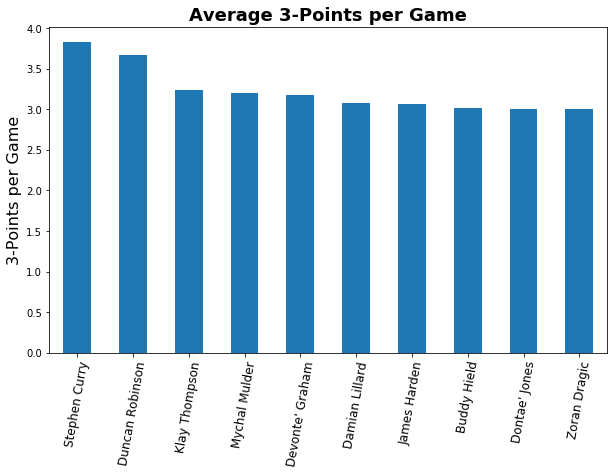

In [296]:
avg_3_points = pd.DataFrame(clean_data[(clean_data['Shot Type']==3) & (clean_data['Shot Made Flag']==1)].\
groupby(['Player Name','Game ID'])['Shot Made Flag'].agg('count').groupby('Player Name').mean().nlargest(10))

index = avg_3_points.index.values.tolist()
ax = avg_3_points.plot.bar(figsize=(10,6),legend=False)
ax.set_title('Average 3-Points per Game',fontsize=18,weight='bold')
ax.set_xlabel('')
ax.set_ylabel("3-Points per Game",fontsize=16)
plt.xticks(np.arange(10), [index[i] for i in range(10)],rotation = 80,fontsize = 12)
plt.show()